In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv")
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
df_grouptotal = df.groupby('Customer type')['Total'].sum().reset_index()
df_grouptotal.columns = ['Customer Type', 'Total']

In [8]:
df_grouptotal

,Customer Type,Total
0,Member,164223.444
1,Normal,158743.305


In [1]:
plt.rcParams['font.family'] = 'serif'  

NameError: name 'plt' is not defined

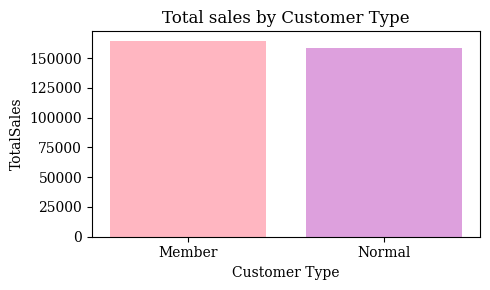

In [10]:
plt.figure(figsize = (5, 3))
colors = ['lightpink', 'plum']
plt.bar(x=df_grouptotal['Customer Type'], height=df_grouptotal['Total'], color=colors)
plt.title('Total sales by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('TotalSales')
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [11]:
df_grouped = df.groupby(['Customer type', 'Gender'], as_index=False)['Total'].sum()
df_grouped

,Customer type,Gender,Total
0,Member,Female,88146.9435
1,Member,Male,76076.5005
2,Normal,Female,79735.9815
3,Normal,Male,79007.3235


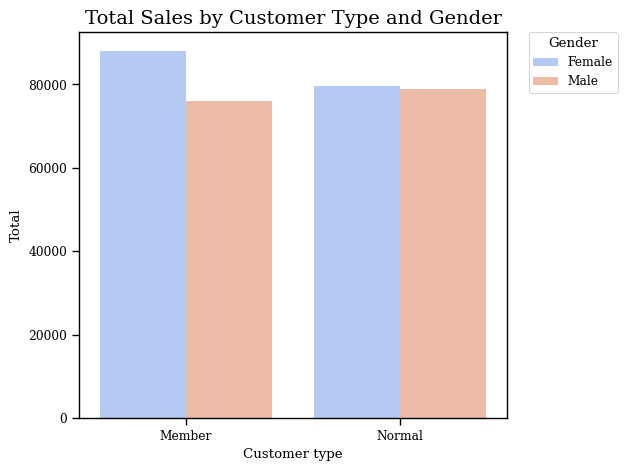

In [12]:
sns.set_context('paper')
sns.barplot(x=df_grouped['Customer type'], y=df_grouped['Total'], hue=df_grouped['Gender'], palette='coolwarm')
plt.title('Total Sales by Customer Type and Gender', fontsize=14)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.9 KB


In [14]:
df['Weekday'] = df['Date'].dt.day_name()

In [15]:
days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
grouped_day = df.groupby('Weekday', sort=False)['Total'].sum().reset_index()
grouped_day['Weekday'] = pd.Categorical(grouped_day['Weekday'], categories=days_order, ordered=True)
grouped_day = grouped_day.sort_values('Weekday')

In [16]:
grouped_day

,Weekday,Total
2,Sunday,44457.8925
3,Monday,37899.0780
6,Tuesday,51482.2455
5,Wednesday,43731.1350
4,Thursday,45349.2480
1,Friday,43926.3405
0,Saturday,56120.8095


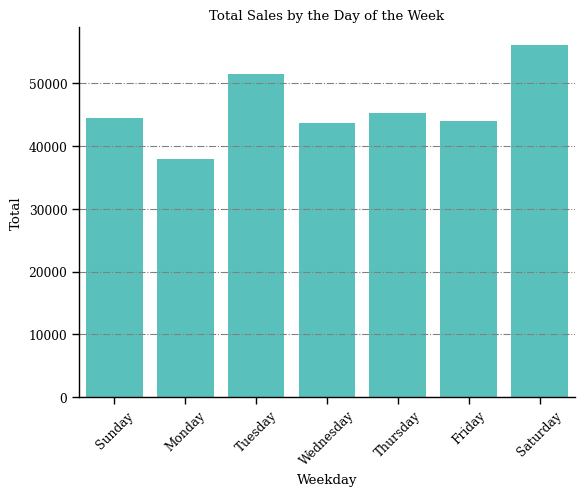

In [17]:
colors = ['mediumturquoise']
sns.barplot(x=grouped_day['Weekday'], y=grouped_day['Total'], palette=colors)
plt.xticks(rotation=45)
plt.title("Total Sales by the Day of the Week")
plt.grid(axis='y', linestyle='-.', color='gray', linewidth=0.8)
plt.legend([], [], frameon=False)
sns.despine()
plt.show()

In [18]:
groupby_branch = df.groupby(['City'])['Total'].sum().reset_index()
groupby_branch

,City,Total
0,Mandalay,106197.6720
1,Naypyitaw,110568.7065
2,Yangon,106200.3705


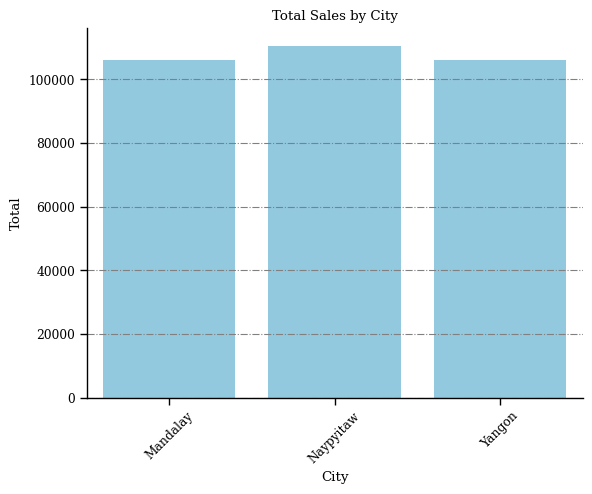

In [19]:
colors = ['skyblue']
sns.barplot(x=groupby_branch['City'], y=groupby_branch['Total'], palette=colors)
plt.title('Total Sales by City')
plt.grid(axis='y', linestyle='-.', color='gray')
plt.xticks(rotation=45)
sns.despine()
plt.show()

In [20]:
grouped_product = df.groupby(['Product line', 'Gender'], as_index=False)['Total'].sum()
grouped_product

,Product line,Gender,Total
0,Electronic accessories,Female,27102.0225
1,Electronic accessories,Male,27235.5090
2,Fashion accessories,Female,30437.4000
3,Fashion accessories,Male,23868.4950
4,Food and beverages,Female,33170.9175
5,Food and beverages,Male,22973.9265
6,Health and beauty,Female,18560.9865
7,Health and beauty,Male,30632.7525
8,Home and lifestyle,Female,30036.8775
9,Home and lifestyle,Male,23825.0355


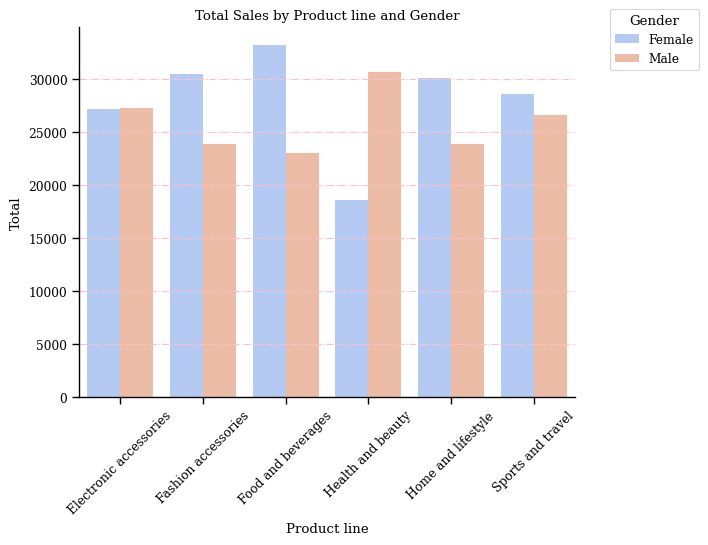

In [21]:
sns.barplot(x=grouped_product['Product line'], y=grouped_product['Total'], hue=grouped_product['Gender'], palette='coolwarm')
plt.grid(axis='y', linestyle='-.', linewidth='0.8', color='pink')
plt.title('Total Sales by Product line and Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender', bbox_to_anchor=(1.25, 1.05), loc='upper right', borderaxespad=0 )
sns.despine()
plt.show()

In [22]:
grouped_income = df.groupby(['Product line', 'Gender'])['gross income'].sum().reset_index()
grouped_income

,Product line,Gender,gross income
0,Electronic accessories,Female,1290.5725
1,Electronic accessories,Male,1296.9290
2,Fashion accessories,Female,1449.4000
3,Fashion accessories,Male,1136.5950
4,Food and beverages,Female,1579.5675
5,Food and beverages,Male,1093.9965
6,Health and beauty,Female,883.8565
7,Health and beauty,Male,1458.7025
8,Home and lifestyle,Female,1430.3275
9,Home and lifestyle,Male,1134.5255


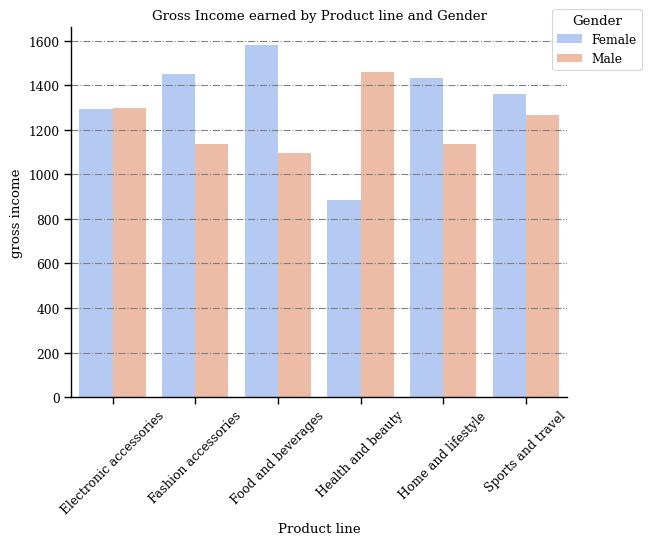

In [23]:
sns.barplot(x='Product line', y='gross income', hue='Gender', data=grouped_income, palette='coolwarm')
plt.grid(axis='y', linestyle='-.', color='gray')
plt.title('Gross Income earned by Product line and Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender', bbox_to_anchor=(1.15, 1.05), borderaxespad=0)
sns.despine()
plt.show()

In [24]:
grouped_ratings = df.groupby('Product line')['Rating'].mean().reset_index()
grouped_ratings

,Product line,Rating
0,Electronic accessories,6.924706
1,Fashion accessories,7.029213
2,Food and beverages,7.113218
3,Health and beauty,7.003289
4,Home and lifestyle,6.837500
5,Sports and travel,6.916265


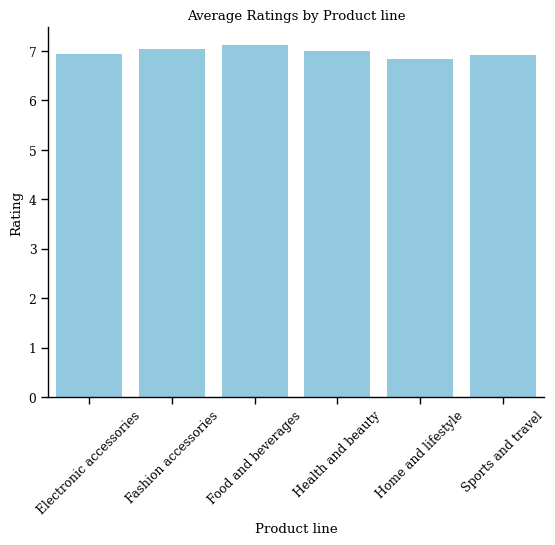

In [25]:
colors = ['skyblue']
sns.barplot(x='Product line', y='Rating', data=grouped_ratings, palette=colors)
plt.title('Average Ratings by Product line')
plt.xticks(rotation=45)
sns.despine()
plt.show()

In [26]:
grouped_quantity = df.groupby(['Product line', 'Gender'])['Quantity'].sum().reset_index()
grouped_quantity

,Product line,Gender,Quantity
0,Electronic accessories,Female,488
1,Electronic accessories,Male,483
2,Fashion accessories,Female,530
3,Fashion accessories,Male,372
4,Food and beverages,Female,514
5,Food and beverages,Male,438
6,Health and beauty,Female,343
7,Health and beauty,Male,511
8,Home and lifestyle,Female,498
9,Home and lifestyle,Male,413


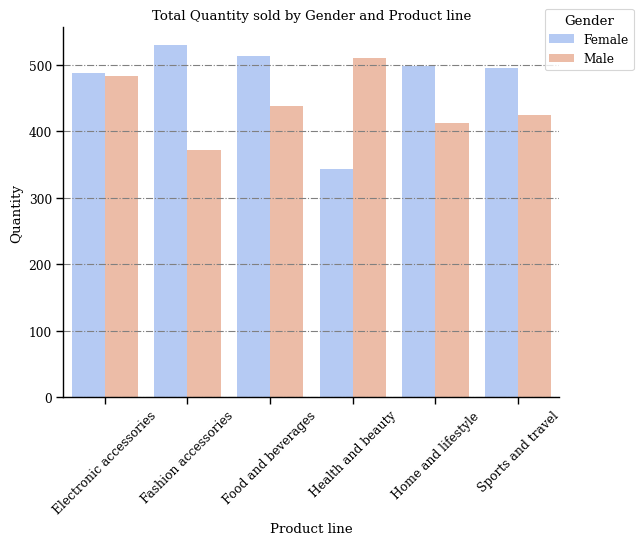

In [27]:
sns.barplot(x='Product line', y='Quantity', hue='Gender', data=grouped_quantity, palette='coolwarm')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-.', color='gray')
plt.legend(title='Gender', bbox_to_anchor=(1.15,1.05), borderaxespad=0)
plt.title('Total Quantity sold by Gender and Product line')
sns.despine()
plt.show()

In [28]:
grouped_quantity_income = df.groupby('Product line')[['Quantity', 'gross income']].sum().reset_index()
grouped_quantity_income

,Product line,Quantity,gross income
0,Electronic accessories,971,2587.5015
1,Fashion accessories,902,2585.9950
2,Food and beverages,952,2673.5640
3,Health and beauty,854,2342.5590
4,Home and lifestyle,911,2564.8530
5,Sports and travel,920,2624.8965


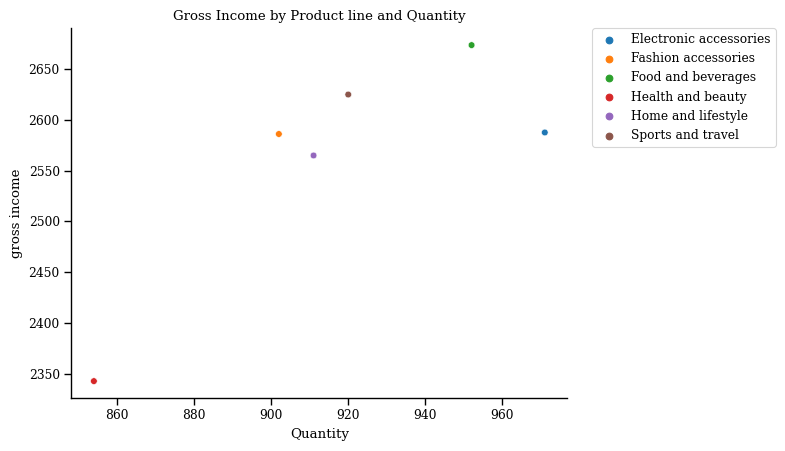

In [29]:
sns.scatterplot(x='Quantity', y='gross income', hue='Product line', data=grouped_quantity_income)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
sns.despine()
plt.title("Gross Income by Product line and Quantity")
plt.show()